<a href="https://colab.research.google.com/github/ruval195/Pattern_Recognition/blob/main/A02_Pr%C3%A1ctica_de_modelos_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimeinto de Patrones
## Diego Francisco Ruvalcaba Loredo
## A02 Práctica de modelos lineales


### HumanR_data

Librerias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Descargar csv

In [76]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/HumanR_data.csv'
data = pd.read_csv('HumanR_data.csv')

--2025-02-01 18:52:17--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/HumanR_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76857 (75K) [text/plain]
Saving to: ‘HumanR_data.csv.2’

HumanR_data.csv.2   100%[===================>]  75.06K  --.-KB/s    in 0.02s   

2025-02-01 18:52:17 (3.11 MB/s) - ‘HumanR_data.csv.2’ saved [76857/76857]



Eliminar columnas inecesarias

In [77]:
drop_cols = ["Salary","Employee_Name", "EmpID", "Zip", "ManagerName", "DateofHire",
             "DateofTermination", "LastPerformanceReview_Date", "ManagerID", "RecruitmentSource",
             "CitizenDesc", "RaceDesc", "MaritalDesc", "Sex", "TermReason", "EmploymentStatus",
             "HispanicLatino","DOB","State", "Position"]
data2 = data.drop(columns=drop_cols, errors='ignore')

Codificacion

In [78]:
data2 = pd.get_dummies(data2, drop_first=True)
data2.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,EngagementSurvey,...,DaysLateLast30,Absences,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,0,0,1,1,5,4,0,0,19,4.60,...,0,1,False,False,True,False,False,False,False,False
1,1,1,1,5,3,3,0,1,27,4.96,...,0,17,False,True,False,False,False,True,False,False
2,1,1,0,5,5,3,0,1,20,3.02,...,0,3,False,False,True,False,False,True,False,False
3,1,1,0,1,5,3,0,0,19,4.84,...,0,15,False,False,True,False,False,True,False,False
4,0,2,0,5,5,3,0,1,19,5.00,...,0,2,False,False,True,False,False,True,False,False


Escalar datos de entrada

In [79]:
from sklearn.preprocessing import StandardScaler

columns = list(data2.columns)

x = np.asanyarray(data2)
x = StandardScaler().fit_transform(x)
y = np.asanyarray(data[['Salary']])

Modelo de Regresion Lineal

In [80]:
from sklearn.model_selection import train_test_split
model = linear_model.LinearRegression()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

print("Entrada original: ", x.shape)
print("Entrada entrenamiento: ", xtrain.shape)
print("Entrada prueba: ", xtest.shape)

print("Salida original: ", y.shape)
print("Salida entrenamiento: ", ytrain.shape)
print("Salida prueba: ", ytest.shape)

model.fit(xtrain, ytrain)
print('R2-score train: ', model.score(xtrain, ytrain))
print('R2-score test: ', model.score(xtest, ytest))

Entrada original:  (311, 22)
Entrada entrenamiento:  (233, 22)
Entrada prueba:  (78, 22)
Salida original:  (311, 1)
Salida entrenamiento:  (233, 1)
Salida prueba:  (78, 1)
R2-score train:  0.5453328920197832
R2-score test:  0.40710526885081944


Variables importantes

                                        coef
names                                       
FromDiversityJobFairID              0.003359
EmpSatisfaction                     0.005537
DaysLateLast30                      0.006668
MaritalStatusID                     0.006779
PerformanceScore_PIP                0.007488
EngagementSurvey                    0.007734
PerformanceScore_Fully Meets        0.009577
Department_IT/IS                    0.010516
MarriedID                           0.011945
PerformanceScore_Needs Improvement  0.013511
Termd                               0.014505
Absences                            0.016324
GenderID                            0.016959
Department_Software Engineering     0.017851
EmpStatusID                         0.018733
PerfScoreID                         0.028020
SpecialProjectsCount                0.029783
PositionID                          0.037577
DeptID                              0.112206
Department_Executive Office         0.122880
Department

Text(0.5, 1.0, 'Importance of variables over the salary')

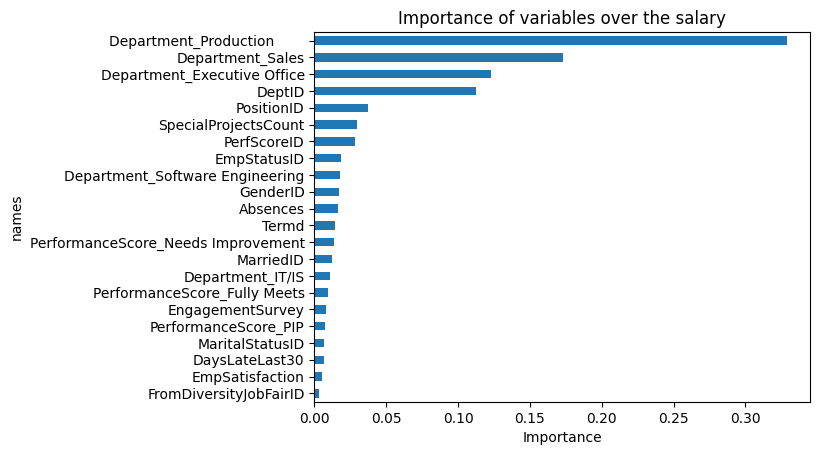

In [81]:
data3 = pd.DataFrame()
coef = np.abs((model.coef_.ravel()))
data3['coef'] = coef / np.sum(coef)
data3['names'] = columns
data3.sort_values(by=['coef'], ascending=True, inplace=True)
data3.set_index('names', inplace=True)
print(data3)

data3.coef.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Importance of variables over the salary')

### Covid dataset

Librerias

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Descargar csv

In [83]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/Covid%20Dataset.csv'
data = pd.read_csv('Covid Dataset.csv')

--2025-02-01 18:52:18--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/Covid%20Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405339 (396K) [text/plain]
Saving to: ‘Covid Dataset.csv.8’

Covid Dataset.csv.8 100%[===================>] 395.84K  --.-KB/s    in 0.04s   

2025-02-01 18:52:18 (8.68 MB/s) - ‘Covid Dataset.csv.8’ saved [405339/405339]



Codificacion de variables

In [84]:
columns = data.select_dtypes(include=['object']).columns
data[columns] = data[columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


Regresion Logistica

In [85]:
# Eleguir variables
drop_cols = ["COVID-19","Gastrointestinal", "Diabetes", "Chronic Lung Disease",
             "Heart Disease", "Hyper Tension"]
x = np.asanyarray(data.drop(columns=drop_cols, errors='ignore'))
y = np.asanyarray(data[['COVID-19']]).ravel()

# Dividir Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# Importar nuevos paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Crear modelo y entrenar
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(solver='lbfgs')) ])

# Crear modelo y entrenar
model.fit(xtrain,ytrain)

# Calcular Score
print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest,ytest))

Train:  0.9757055214723926
Test:  0.9587932303164092


Predicciones

In [86]:
from sklearn.metrics import accuracy_score

ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

print('Accuracy train:', accuracy_score(ytrain, ytrain_pred))
print('Accuracy test:', accuracy_score(ytest, ytest_pred))

Accuracy train: 0.9757055214723926
Accuracy test: 0.9587932303164092


Matriz de Confusión

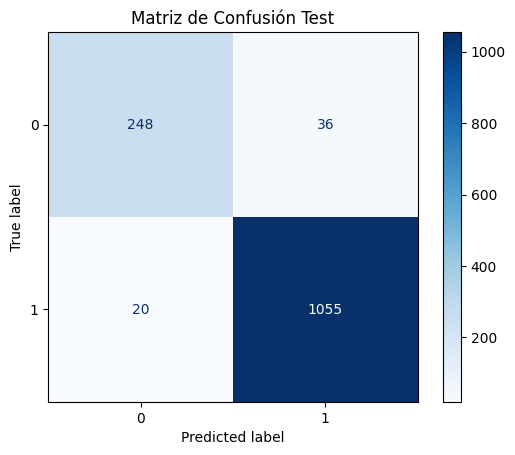

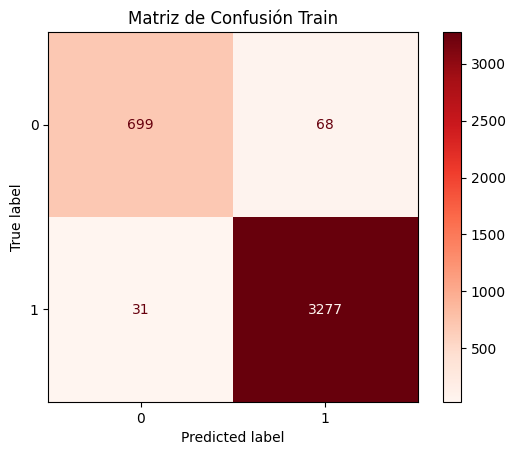

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, ytest_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión Test")
plt.show()

cm = confusion_matrix(ytrain, ytrain_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Matriz de Confusión Train")
plt.show()

Reporte de clasificacion

In [88]:
from sklearn.metrics import classification_report

print("Reporte de Clasificación Test:")
print(classification_report(ytest, ytest_pred))

print("Reporte de Clasificación Train:")
print(classification_report(ytrain, ytrain_pred))

Reporte de Clasificación Test:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       284
           1       0.97      0.98      0.97      1075

    accuracy                           0.96      1359
   macro avg       0.95      0.93      0.94      1359
weighted avg       0.96      0.96      0.96      1359

Reporte de Clasificación Train:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       767
           1       0.98      0.99      0.99      3308

    accuracy                           0.98      4075
   macro avg       0.97      0.95      0.96      4075
weighted avg       0.98      0.98      0.98      4075



###Conclusion

Los modelos lineales son una de las herramientas fundamentales en el análisis de datos y el reconocimiento de patrones. Su simplicidad y facilidad de interpretación los hacen ideales para comprender relaciones entre variables y hacer predicciones en diversas áreas. Sin embargo, su mayor limitación es la suposición de linealidad, lo que significa que no siempre son adecuados para datos complejos con relaciones no lineales.

In [89]:
print("End")

End
